In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


In [2]:
data_dir = "C:/Users/shash/Downloads/train (1) (1)/train"

img_hight = 100
img_width = 180
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_hight, img_width),
    batch_size=batch_size)


val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_hight, img_width),
    batch_size=batch_size)

class_names = train_ds.class_names
print("class_names:", class_names)

Found 350 files belonging to 7 classes.
Using 280 files for training.
Found 350 files belonging to 7 classes.
Using 70 files for validation.
class_names: ['Angry', 'Disguist', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']


In [3]:
#step 2
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [4]:
# Step 3
model =models.Sequential([
    layers.Rescaling(1./255, input_shape=(img_hight, img_width, 3)),
    layers.Conv2D(32,3,activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128,3,activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(len(class_names),activation='softmax')
])

C:\Users\shash\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [5]:
# step 4
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [6]:
# step 5 
epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/10


9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 256ms/step - accuracy: 0.1275 - loss: 2.1946 - val_accuracy: 0.1286 - val_loss: 1.9527
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 216ms/step - accuracy: 0.1664 - loss: 1.9356 - val_accuracy: 0.1000 - val_loss: 1.9404
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 239ms/step - accuracy: 0.2654 - loss: 1.8951 - val_accuracy: 0.1571 - val_loss: 1.9437
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 261ms/step - accuracy: 0.3834 - loss: 1.7631 - val_accuracy: 0.2286 - val_loss: 1.9386
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 236ms/step - accuracy: 0.4513 - loss: 1.5108 - val_accuracy: 0.1857 - val_loss: 2.3714
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 222ms/step - accuracy: 0.5781 - loss: 1.2007 - val_accuracy: 0.2143 - val_loss: 2.3541
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 219ms/step - accuracy: 0.6829 - loss: 0.8728 - val_accuracy: 0.2000 - val_loss: 2.6325
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 218ms/step - accuracy: 0.8031 - loss: 0.6249 - val_accuracy: 0.3000 - val_loss: 2.8948
Epo

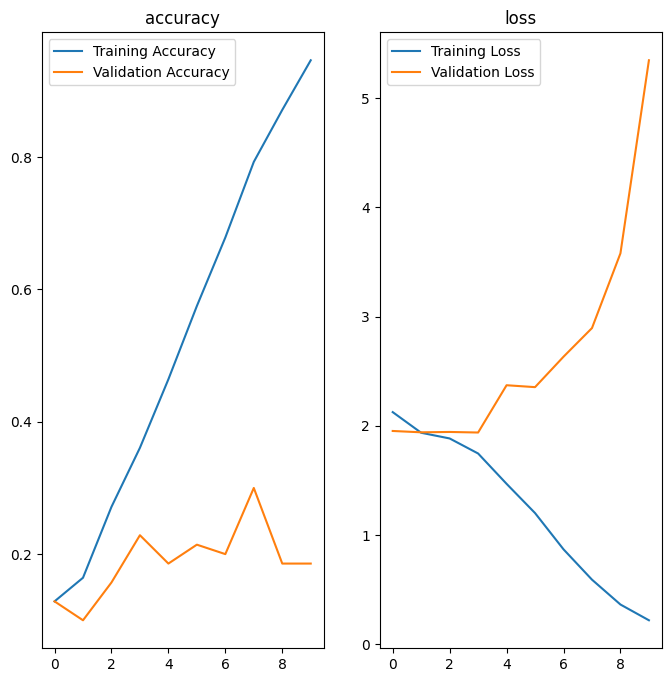

In [7]:
# step 6

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend()
plt.title("accuracy")

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.title("loss")
plt.show()